# Classification

#Sınıflandırma * Cevabı evet hayır olan sorular için classification modellerini kullanıyoruz. Metriklerimiz Confusion Matrix Accuracy, F1 Score Preicision ev Recall

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('hr_data.csv')

In [4]:
#EDA - Exploratory Data Analysis

In [5]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [10]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1000,52,Travel_Rarely,258,Research & Development,8,4,Other,1,1409,3,Female,54,3,1,Laboratory Technician,1,1,2458.41701,17363,9,Y,No,13,3,3,80,0,12,2,1,5,4,0,4,NaN


In [11]:
# Attririon işten ayrılma

In [12]:
df.shape

(1470, 35)

In [15]:
df.describe().T #transpose satırlar sütun sütunlar satır olur.

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [18]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [20]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [21]:
df['Attrition'].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

In [22]:
 import seaborn as sns

<Axes: xlabel='Attrition', ylabel='count'>

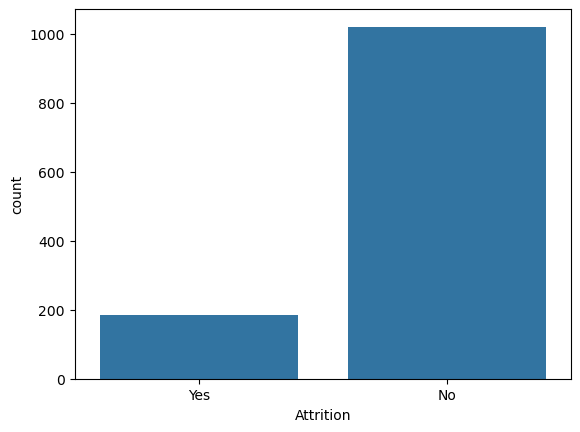

In [23]:
sns.countplot(x=df['Attrition'])

In [24]:
d={'No':0,'Yes':1}

In [25]:
df['Attrition']=df['Attrition'].map(d) #map kelimesi for döngüsünün modern hali

In [26]:
df['Attrition'].value_counts()

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

In [27]:
bos=df[df['Attrition'].isnull()]
dolu=df[df['Attrition'].notnull()]

In [48]:
x=dolu.drop('Attrition',axis=1)
y=dolu['Attrition']

In [49]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [50]:
x=pd.get_dummies(x,drop_first=True)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [53]:
x.shape

(1205, 46)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [60]:
g=GaussianNB()
b=BernoulliNB()

In [61]:
g.fit(x_train, y_train)

GaussianNB()

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
gtahmin=g.predict(x_test)

In [66]:
accuracy_score(gtahmin,y_test)

0.7883817427385892

In [67]:
confusion_matrix(gtahmin,y_test)

array([[171,  11],
       [ 40,  19]], dtype=int64)

In [68]:
import seaborn as sns

<Axes: >

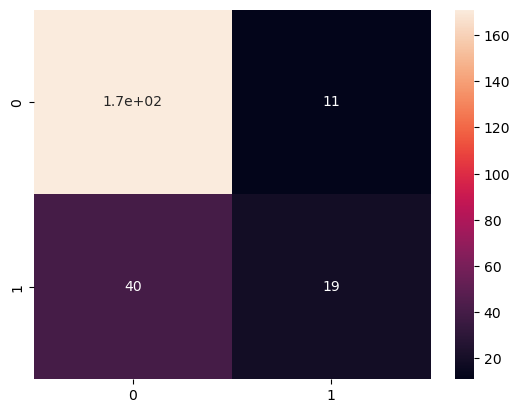

In [69]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True)

In [70]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [71]:
b.fit(x_train,y_train)

BernoulliNB()

In [72]:
btahmin=b.predict(x_test)

In [73]:
accuracy_score(gtahmin,y_test)

0.7883817427385892

In [74]:
confusion_matrix(gtahmin,y_test)

array([[171,  11],
       [ 40,  19]], dtype=int64)

<Axes: >

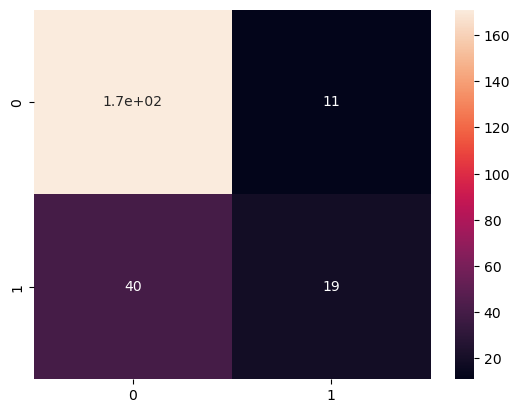

In [77]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True)

In [78]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



In [79]:
# SMOTE #

In [80]:
from sklearn.linear_model import LogisticRegression

In [83]:
l=LogisticRegression()

In [84]:
l.fit(x_train,y_train)

LogisticRegression()

In [91]:
ltahmin=l.predict(x_test)

In [92]:
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       239
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       241
   macro avg       0.50      0.44      0.46       241
weighted avg       0.98      0.87      0.92       241



In [93]:
confusion_matrix(ltahmin,y_test)

array([[209,  30],
       [  2,   0]], dtype=int64)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
d=DecisionTreeClassifier()

In [97]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
dtahmin=d.predict(x_test)

In [99]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       199
         1.0       0.33      0.24      0.28        42

    accuracy                           0.78       241
   macro avg       0.59      0.57      0.58       241
weighted avg       0.76      0.78      0.77       241



In [100]:
confusion_matrix(dtahmin,y_test )

array([[179,  20],
       [ 32,  10]], dtype=int64)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
r=RandomForestClassifier()

In [104]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
rtahmin=r.predict(x_test)

In [106]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       237
         1.0       0.10      0.75      0.18         4

    accuracy                           0.88       241
   macro avg       0.55      0.82      0.56       241
weighted avg       0.98      0.88      0.92       241



In [107]:
confusion_matrix(rtahmin,y_test)

array([[210,  27],
       [  1,   3]], dtype=int64)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
g=GradientBoostingClassifier()

In [110]:
g.fit(x_train,y_train)

GradientBoostingClassifier()

In [111]:
gtahmin=g.predict(x_test)

In [112]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.20      0.67      0.31         9

    accuracy                           0.89       241
   macro avg       0.59      0.78      0.62       241
weighted avg       0.96      0.89      0.92       241



In [113]:
confusion_matrix(gtahmin,y_test)

array([[208,  24],
       [  3,   6]], dtype=int64)

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
k=KNeighborsClassifier()

In [117]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
ktahmin=k.predict(x_test)

In [119]:
confusion_matrix(ktahmin,y_test)

array([[205,  29],
       [  6,   1]], dtype=int64)